In [110]:
# Implementation of the basic perceptron on a linear data
# the model is trained with two and three features respectively
# Author: Muhammad Humayun Khan

import numpy as np        # linear algebra
import pandas as pd       # data read and processing
import matplotlib.pyplot as plt     # data plotting
import seaborn as sns

In [111]:
dataset = '/content/drive/MyDrive/datasets/placement_perceptron.csv'
df = pd.read_csv(dataset)

df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

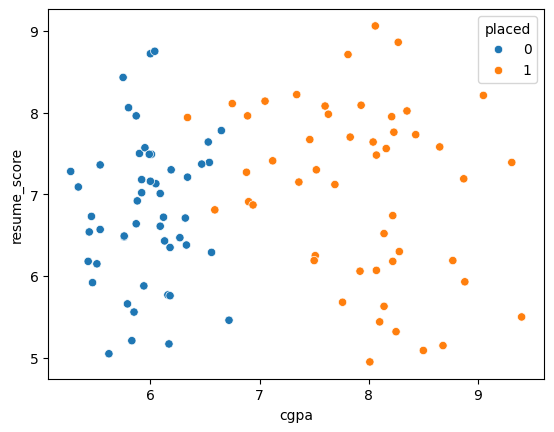

In [112]:
# plot the data
sns.scatterplot(x='cgpa',y='resume_score',hue='placed',data=df)

In [113]:
# now get the X and y from the dataset
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

X.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [114]:
y.head()

,placed
0,1
1,0
2,1
3,1
4,1


In [115]:
# Now train the model using perceptron
from sklearn.linear_model import Perceptron

p = Perceptron()      # object of the class
p.fit(X,y)            # train the model


Perceptron()

In [116]:
# calculate the weight (w1 and w2) and intercept (b)
w1 = p.coef_[0][0]
print("Weight w1 = ",w1)

w2 = p.coef_[0][1]
print("Weight w2 = ",w2)

b = p.intercept_
print("Intercept b = ",b)

Weight w1 =  40.26000000000006
Weight w2 =  -35.99999999999997
Intercept b =  [-25.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


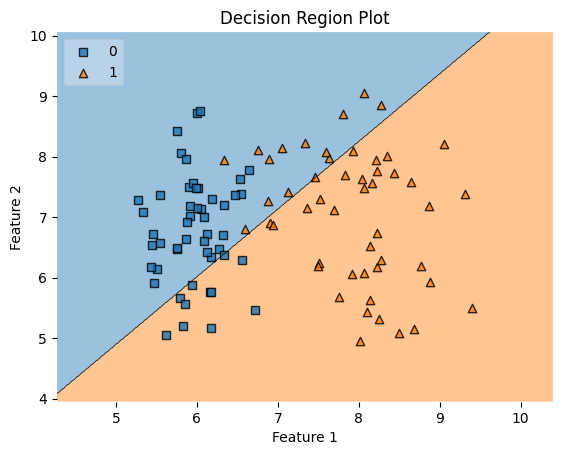

In [117]:
# now plot the regions
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf=p,legend=2)   # clf = classifier, legends = regions
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot')
plt.show()

**Perceptron using three X features - It will have a plane rather than line**

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Perceptron

# Perceptron using three features
dataset = '/content/drive/MyDrive/datasets/placement_perceptron_three_features.csv'
df = pd.read_csv(dataset)

df.head()

,cgpa,resume_score,personality_test,placed
0,8.14,6.52,3,1
1,6.17,5.17,3,0
2,8.27,8.86,5,1
3,6.88,7.27,4,1
4,7.52,7.30,3,1


In [119]:
# Extract features and target variable
X = df[['cgpa', 'resume_score', 'personality_test']].values
y = df['placed'].values


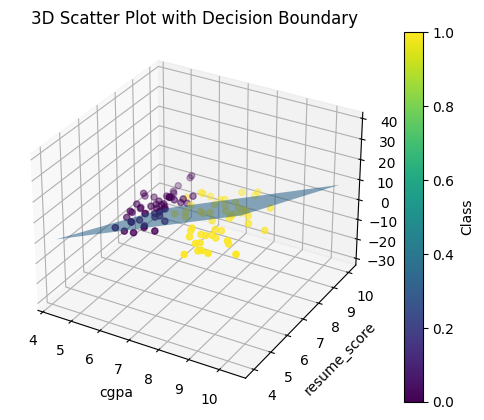

In [120]:
# Train a perceptron model
p = Perceptron()
p.fit(X, y)

# Get model parameters
w = p.coef_[0]
b = p.intercept_[0]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o')

# Create a meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Check if w[2] is zero to avoid division by zero
if w[2] != 0:
    # Solve for x3: x3 = (-w1*x1 - w2*x2 - b) / w3
    zz = (-w[0] * xx - w[1] * yy - b) / w[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100)
else:
    print("Warning: The third coefficient is zero, cannot plot decision boundary.")

# Labels and title
ax.set_xlabel('cgpa')
ax.set_ylabel('resume_score')
ax.set_zlabel('personality_test')
ax.set_title('3D Scatter Plot with Decision Boundary')

# Show plot
plt.colorbar(scatter, ax=ax, label='Class')
plt.show()